In [ ]:
#adjust notebook size
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# import some libraries to work with
import sys
sys.path.append('packages')
from best_distribution import best_distribution as bd
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm 
import statistics
import seaborn as sns
import scipy.stats
import numpy as np

In [4]:
# get the brussels data 
brussel = list()
for bestandsnaam in os.listdir('data/daily_production/BRU/'):
    data = pd.read_json('data/daily_production/BRU/'+bestandsnaam, typ='series')
    row = pd.Series(data)
    brussel.append(row)
    brussel_data= pd.DataFrame(brussel)

In [ ]:
# short check if this is the data that we can work with
brussel_data

In [ ]:
# derrive a new variable from the panda dataframe
brussel_data_nulls = brussel_data

In [ ]:
# let's check the fields that are marked with maintenance 'yes'
for index, field in brussel_data_nulls.iterrows() :
    if field['maintenance']=="Yes":
        display(field)

In [ ]:
# observation 1: in brussels there is no #MV when there is no maintenance.
# Meaning that when there is no maintenance, there is always production or production loss data.
# we have no data if the maintenance is scheduled or not, we only notice that there is no data on days
# marked with maintenance 'yes'

for index, field in brussel_data_nulls.iterrows() :
    if  field['production']=='#MV' and field['maintenance']!="Yes":
        display(field)

In [ ]:
# based on argument above
# we can determine for certain that in brussels there is no other recording 
# than at hour 1 of the day there is no registration of maintenance on other timestamps

for index, field in brussel_data_nulls.iterrows() :
    if field['maintenance']=="Yes" and field['hour'] !=1:
        display(field)

In [ ]:
# first couple of conclusions:
# to make a prediction of the production capability of brussels 
# we can remove the rows where the record is marked with maintenance yes, since the task is 
# to make a simulation, not to check for optimalisations in maintenance
# conclusion two, if there is time left: 
# just for the sake of it
# we can make the #MV values as 0 and plot them to see when the specific timings of maintenance occur

In [5]:
# creating a new df with the dropped the #MV records 
brussel_data_wo_nulls = brussel_data.replace({"#MV": np.nan}).dropna()

In [ ]:
# check the dataframe
display(brussel_data_wo_nulls)

In [6]:
# let's set the objects to ints so we can use them for the graphs
brussel_data_wo_nulls['production'] = brussel_data_wo_nulls['production'].astype(int)
brussel_data_wo_nulls['prod_loss']  = brussel_data_wo_nulls['prod_loss'].astype(int)
# percentage is not used but we int it anyway just to do a describe of the dataframe
brussel_data_wo_nulls['prod_loss_perc']  = brussel_data_wo_nulls['prod_loss_perc'].astype(int)

In [7]:
# let's describe the dataset
brussel_data_wo_nulls.describe()

,hour,minute,prod_loss,prod_loss_perc,production
count,1736.0,1736.0,1736.000000,1736.000000,1736.000000
mean,1.0,0.0,430.288018,34.579493,813.711982
std,0.0,0.0,390.712496,31.413713,390.712496
min,1.0,0.0,51.000000,4.000000,0.000000
25%,1.0,0.0,196.750000,16.000000,860.750000
50%,1.0,0.0,270.500000,22.000000,973.500000
75%,1.0,0.0,383.250000,31.000000,1047.250000
max,1.0,0.0,1244.000000,100.000000,1193.000000


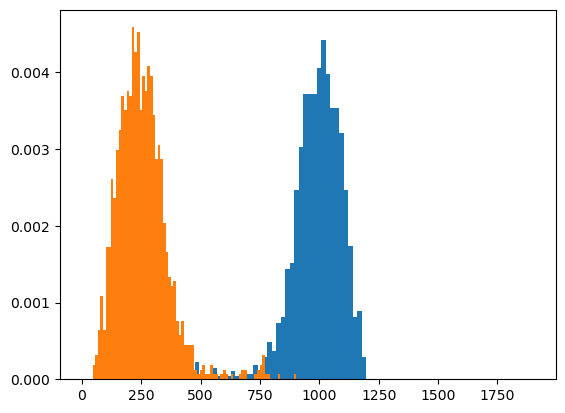

In [8]:
# make a hist plot of the production and the production loss
# let's the zeros from the histview on the distribution 
# we can see a nice pattern emerging around the 1000 for production and around 250 for production loss
plt.hist(brussel_data_wo_nulls['production'],range=(1,1900),bins=100, density = True);
plt.hist(brussel_data_wo_nulls['prod_loss'],range=(1,1100),bins=100, density = True);

In [9]:
# let's use the function to see which distribution best fits the dataset of the production data
best_distribution, best_params = bd.find_best_fit_distribution_continuous(brussel_data_wo_nulls['production'])
 

# Print the best-fit distribution and its parameters
print(f"Best-fit distribution: {best_distribution.name}")
print(f"Parameters: {best_params}")

Best-fit distribution: norm
Parameters: (813.7119815668203, 390.59994766911433)


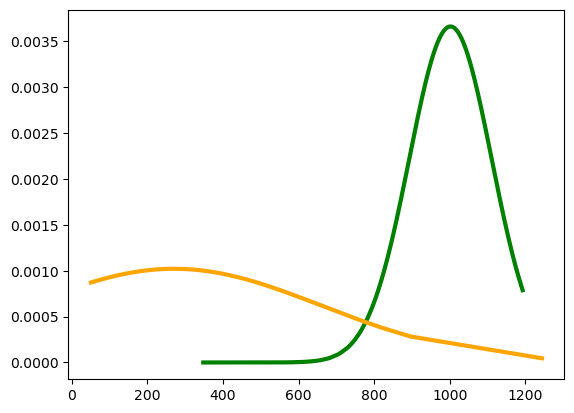

In [10]:
# let's make a nicer plot to see how the distribution look like

x_axis = (brussel_data_wo_nulls['production'].replace({0: np.nan}).dropna(axis=0)).sort_values()
x_axis_2 = (brussel_data_wo_nulls['prod_loss'].replace({0: np.nan}).dropna(axis=0)).sort_values()
# Calculating mean and standard deviation 
mean = statistics.mean(x_axis) 
sd = statistics.stdev(x_axis) 
mdian = statistics.median(x_axis)
mean_2 = statistics.mean(x_axis_2) 
sd_2 = statistics.stdev(x_axis_2) 
mdian_2 = statistics.median(x_axis_2)
plt.plot(x_axis, norm.pdf(x_axis, mdian, sd),color='green', linewidth=3) 
plt.plot(x_axis_2, norm.pdf(x_axis_2, mdian_2, sd_2),color='orange', linewidth=3) 
plt.show()

In [11]:
# let's separate the production and production loss into pandas series 
brussel_production_wo_nulls  =brussel_data_wo_nulls['production']
brussel_prod_loss_wo_nulls  =brussel_data_wo_nulls['prod_loss']

813.7119815668203 is the mean
973.5 is the median
Variance: 152568.31911911553
390.59994766911433 is the standard deviation
negative skew


/Users/geertvanderkrieken/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/geertvanderkrieken/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


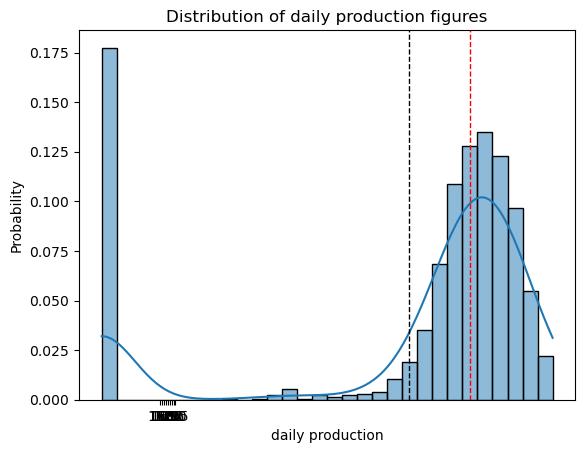

In [12]:
# based on everything above we make a better plot for production data that shows also the details
# mean, variance, standard deviation, skew and median,
# along with a very cool graph that represents all of this




display_production_data_brussels = brussel_production_wo_nulls.sort_values()

production_mean = display_production_data_brussels.mean()
production_median = np.median(display_production_data_brussels)
production_std = statistics.pstdev(display_production_data_brussels)
production_variance = np.var(display_production_data_brussels)
skew = "negative skew" if np.median(display_production_data_brussels)-display_production_data_brussels.mean()>0 else "positive skew"

# numpy_data = np.random.normal(data_mean, data_std)
# numpy_data = (numpy_data - data_mean)/data_std


sns.histplot(display_production_data_brussels, bins=30, kde=True, stat='probability')
plt.axvline(display_production_data_brussels.mean(), color='black', linestyle='dashed', linewidth=1)
plt. axvline(np.median(display_production_data_brussels), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('daily production')
plt.ylabel('Probability')
plt.title("Distribution of daily production figures")
plt.xticks(range(155,200,5))
print(f'{production_mean} is the mean')
print(f'{production_median} is the median')
print(f"Variance: {production_variance}")
print(f'{production_std} is the standard deviation')
print(f'{skew}')
plt.show()



In [23]:
voorspellingen_production = bd.volgende_vijf_dagen_voorspellen(813.7119815668203, 390.59994766911433)
totaal =0
print('de volgende 5 dagen is dit de mogelijke productie: ')
for voorspelling in voorspellingen_production:
    print (f' {voorspelling}')
    totaal +=voorspelling
print(f'de mogelijke hoeveelheid productie voor de volgende 5 dagen is {totaal}')

de volgende 5 dagen is dit de mogelijke productie: 
 1204
 640
 1132
 727
 1162
de mogelijke hoeveelheid productie voor de volgende 5 dagen is 4865


430.28801843317973 is the mean
270.5 is the median
Variance: 152568.3191191159
390.59994766911433 is the standard deviation
positive skew


/Users/geertvanderkrieken/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/geertvanderkrieken/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


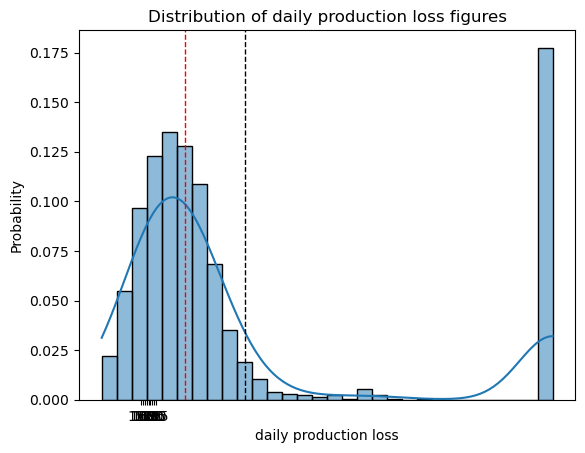

In [19]:
# based on everything above we make a better plot for production lossb data that shows also the details
# mean, variance, standard deviation, skew and median,
# along with a very cool graph that represents all of this
data_to_display_prod_loss = brussel_prod_loss_wo_nulls.sort_values()

# with the above figures I can recreate a normal distribution with numpy:
prod_loss_mean = data_to_display_prod_loss.mean()
prod_loss_median = np.median(data_to_display_prod_loss)
prod_loss_std = statistics.pstdev(data_to_display_prod_loss)
prod_loss_var = np.var(data_to_display_prod_loss)
skew = "negative skew" if np.median(data_to_display_prod_loss)-data_to_display_prod_loss.mean()>0 else "positive skew"

#numpy_data_prod_loss = np.random.normal(data_mean_prod_loss, data_std_prod_loss)
#numpy_data_prod_loss = (numpy_data_prod_loss - data_mean_prod_loss)/data_std_prod_loss

sns.histplot(data_to_display_prod_loss, bins=30, kde=True, stat='probability')
plt.axvline(data_to_display_prod_loss.mean(), color='black', linestyle='dashed', linewidth=1)
plt. axvline(np.median(data_to_display_prod_loss), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('daily production loss')
plt.ylabel('Probability')
plt.title("Distribution of daily production loss figures")
plt.xticks(range(155,200,5))
print(f'{prod_loss_mean} is the mean')
print(f'{prod_loss_median} is the median')
print(f"Variance: {prod_loss_var}")
print(f'{prod_loss_std} is the standard deviation')
print(f'{skew}')
plt.show()

In [22]:
voorspellingen_production_verlies = bd.volgende_vijf_dagen_voorspellen(430.28801843317973, 390.59994766911433)
totaal =0
print('de volgende 5 dagen is dit het mogelijke productie verlies: ')
for voorspelling in voorspellingen_production_verlies:
    print (f' {voorspelling}')
    totaal +=voorspelling
print(f'de mogelijke hoeveelheid productie verlies voor de volgende 5 dagen is {totaal}')

de volgende 5 dagen is dit het mogelijke productie verlies: 
 1278
 253
 466
 44
 523
de mogelijke hoeveelheid productie verlies voor de volgende 5 dagen is 2564
